In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
from IPython.core.display import display, HTML
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 1
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import os
import seaborn as sns
import pandas as pd
import math

from Utils.UtilsGeoViz import *
from Utils.UtilsViz import *
from Utils.DataUtils import *

In [3]:
US_coord = [37.0902, -102]
NY_COORD = [40.7128, -74.0060]
# data_path = os.path.join(os.getcwd(), "Data")
ny_datapath = "C:\\Users\\sriharis\\OneDrive\\UChicago\\DataMining\\project\\NYData\\"

In [4]:
listings = pd.read_csv(os.path.join(ny_datapath, "listings.csv"))

In [5]:
listings['price'] = listings['price'].str.strip('').str.strip('$').str.replace(',', '').astype('float')

------------------

# Listings per neighbourhood 

In [36]:
nbhood_listings_data = listings[["id", "neighbourhood"]].groupby(by="neighbourhood", as_index=False).count()
nbhood_listings_data = nbhood_listings_data.sort_values(by="id", ascending=False)
nbhood_listings_data.reset_index(drop=True, inplace=True)

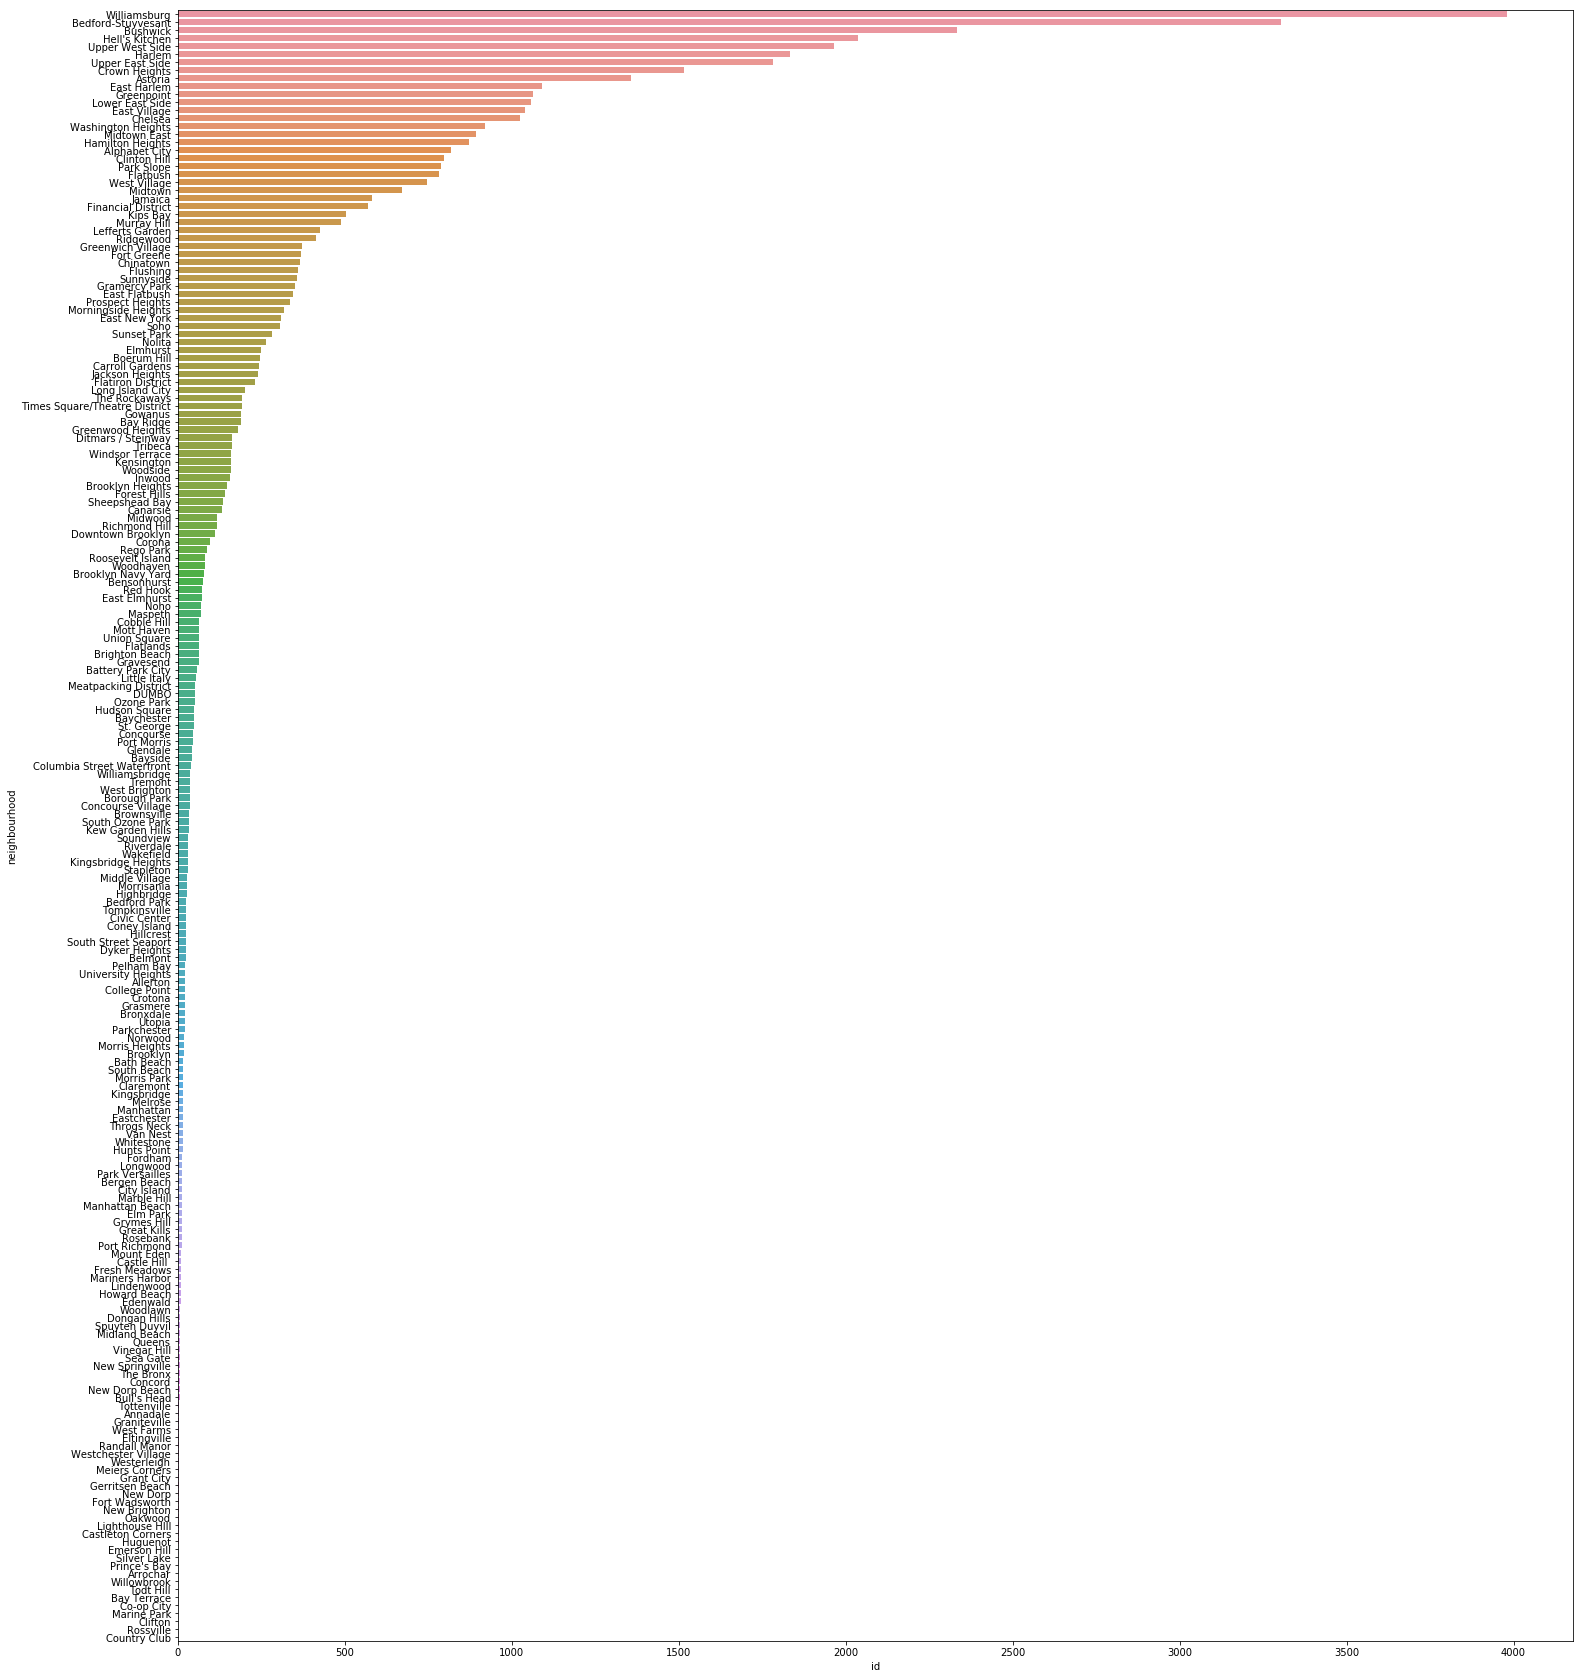

In [20]:
f, ax = plt.subplots(1, 1, figsize=(25, 30))
sns.barplot(x="id", y="neighbourhood", data=nbhood_listings_data, ax=ax)

In [22]:
listings_loc_data = listings[["latitude", "longitude", "id"]]
listings_loc_group = listings_loc_data.groupby(by=["latitude", "longitude"], as_index=False, 
                                           sort=False).count()

lats=list(listings_loc_group["latitude"].values)
lons=list(listings_loc_group["longitude"].values)
mag=list(listings_loc_group["id"].values)

In [58]:
neighbourhoods_geojson_path = os.path.join(ny_datapath, "neighbourhoods.geojson")
    
th_scale = get_th_scale(data=nbhood_listings_data, col="id", n_steps=6) # , transform_func=math.log, inv_transform_func=math.exp

m1 = folium.Map(location=NY_COORD, tiles='OpenStreetMap', zoom_start=12)
# Add a choropleth map
m1 = add_choroplethmap(m1=m1, data=nbhood_listings_data,
                       json_path=neighbourhoods_geojson_path, 
                       json_key='feature.properties.neighbourhood', 
                       threshold_scale=th_scale,
                       name="Neighbourhoods with listings")
# m1
# m1 = addMarkerClusters(m1, listings_loc_data["latitude"].values, listings_loc_data["longitude"].values)
open_map_in_browser(m1, os.path.join(ny_datapath, "geo_listings.html"))

------------------

# Most expensive neighbourhoods 

Let's make a price per listing for each neighbourhood

In [8]:
nbhood_price_data = listings[["price", "neighbourhood"]].groupby(by="neighbourhood", as_index=False).median() # agg(["mean", "median", "max", "min"])
nbhood_price_data.head()

,neighbourhood,price
0,Allerton,70.0
1,Alphabet City,140.0
2,Annadale,87.5
3,Arrochar,79.0
4,Astoria,84.0


In [9]:
neighbourhoods_geojson_path = os.path.join(ny_datapath, "neighbourhoods.geojson")
    
th_scale = get_th_scale(data=nbhood_price_data, col="price", n_steps=6) # , transform_func=math.log, inv_transform_func=math.exp

m1 = folium.Map(location=NY_COORD, tiles='OpenStreetMap', zoom_start=12)
# Add a choropleth map
m1 = add_choroplethmap(m1=m1, data=nbhood_price_data,
                       json_path=neighbourhoods_geojson_path, 
                       json_key='feature.properties.neighbourhood', 
                       threshold_scale=th_scale,
                       name="Neighbourhoods Median Price",
                      color='Greens')

# https://stackoverflow.com/questions/44771779/adding-label-text-box-style-to-folium-output

open_map_in_browser(m1, os.path.join(ny_datapath, "geo_price.html"))

------------

# Neighbourhood groups 

In [6]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2454,https://www.airbnb.com/rooms/2454,20190201155637,2019-02-01,superCondo,"Great light, exposed brick and 10 feet high ce...","A fully renovated, West Elm furnished Condo, w...","Great light, exposed brick and 10 feet high ce...",none,Turtle bay neighborhood in the heart of midtow...,NaN,"4,5,6, trains 3 minutes away walking distance",NaN,available,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/4643/708f9...,NaN,2688,https://www.airbnb.com/users/show/2688,Ben,2008-09-03,US,NaN,within a day,60%,NaN,f,https://a0.muscache.com/im/pictures/user/ad93f...,https://a0.muscache.com/im/pictures/user/ad93f...,Midtown East,1.0,1.0,"['email', 'phone']",t,f,"New York, NY, United States",Midtown East,Midtown,Manhattan,New York,NY,10022,New York,"New York, NY",US,United States,40.755523,-73.967679,t,Condominium,Entire home/apt,2,1.0,0.0,2.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",NaN,137.0,NaN,NaN,NaN,NaN,1,$0.00,7,730,7,7,730,730,7.0,730.0,2 days ago,t,16,36,65,65,2019-02-01,1,1,2019-01-30,2019-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,1,0,0,1.00
1,2539,https://www.airbnb.com/rooms/2539,20190201155637,2019-02-02,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,If this room is unavailable on your desired da...,Very close to F and G trains and Express bus i...,NaN,NaN,-The security and comfort of all our guests is...,NaN,NaN,https://a0.muscache.com/im/pictures/3949d073-a...,NaN,2787,https://www.airbnb.com/users/show/2787,John,2008-09-07,"New York, New York, United States",Educated professional living in Brooklyn. I l...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/8674565a-7...,https://a0.muscache.com/im/pictures/8674565a-7...,Gravesend,8.0,8.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn , NY, United States",Kensington,Kensington,Brooklyn,Brooklyn,NY,11218,New York,"Brooklyn , NY",US,United States,40.647486,-73.972370,f,Apartment,Private room,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",NaN,149.0,$299.00,$999.00,$100.00,$25.00,1,$25.00,1,730,1,1,730,730,1.

In [7]:
listings["neighbourhood_group_cleansed"].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [30]:
subset = listings[["id", "neighbourhood_cleansed", "neighbourhood_group_cleansed", "price", "host_is_superhost"]]
subset.head()

,id,neighbourhood_cleansed,neighbourhood_group_cleansed,price,host_is_superhost
0,2454,Midtown,Manhattan,137.0,f
1,2539,Kensington,Brooklyn,149.0,f
2,2595,Midtown,Manhattan,225.0,f
3,3330,Williamsburg,Brooklyn,70.0,f
4,3647,Harlem,Manhattan,150.0,f


### Number of listings

In [11]:
nbhood_grp_grp = subset[["id", "neighbourhood_group_cleansed"]].groupby(by=["neighbourhood_group_cleansed"], as_index=False).count()
nbhood_grp_grp

,neighbourhood_group_cleansed,id
0,Bronx,977
1,Brooklyn,20500
2,Manhattan,22839
3,Queens,5565
4,Staten Island,347


In [15]:
def get_lcount(n):
    nbhgrp = subset[subset["neighbourhood_cleansed"]==n]["neighbourhood_group_cleansed"].values[0]
    return nbhood_grp_grp[nbhood_grp_grp["neighbourhood_group_cleansed"]==nbhgrp]["id"].values[0]

subset1 = {"neighbourhood":[],
           "count":[]
          }           
for n in subset["neighbourhood_cleansed"].unique():
    subset1["neighbourhood"].append(n)
    subset1["count"].append(get_lcount(n))
    
nbhood_listings_count = pd.DataFrame(subset1)
nbhood_listings_count = nbhood_listings_count[["neighbourhood", "count"]]
# nbhood_listings_count

In [25]:
neighbourhoods_geojson_path = os.path.join(ny_datapath, "neighbourhoods.geojson")
    
# th_scale = get_th_scale(data=nbhood_listings_count, col="count", n_steps=6) # , transform_func=math.log, inv_transform_func=math.exp
th_scale = np.sort(nbhood_listings_count["count"].unique())
th_scale[-1] = th_scale[-1]+1

display(th_scale)

m1 = folium.Map(location=NY_COORD, tiles='OpenStreetMap', zoom_start=12)
# m1 = folium.Map(location=NY_COORD, tiles='Mapbox Bright', zoom_start=12)

# # Add a choropleth map
m1 = add_choroplethmap(m1=m1, data=nbhood_listings_count,
                       json_path=neighbourhoods_geojson_path, 
                       json_key='feature.properties.neighbourhood', 
                       threshold_scale=th_scale,
                       name="Neighbourhoods with listings",
                      color="Reds")
# m1
open_map_in_browser(m1, os.path.join(ny_datapath, "geo_listings_grp.html"))

array([  347,   977,  5565, 20500, 22840], dtype=int64)

### Median price

In [26]:
nbhood_grp_grp = subset[["price", "neighbourhood_group_cleansed"]].groupby(by=["neighbourhood_group_cleansed"], as_index=False).mean()
nbhood_grp_grp

,neighbourhood_group_cleansed,price
0,Bronx,86.308086
1,Brooklyn,121.573756
2,Manhattan,192.853102
3,Queens,96.848518
4,Staten Island,110.766571


In [28]:
def get_lcount(n):
    nbhgrp = subset[subset["neighbourhood_cleansed"]==n]["neighbourhood_group_cleansed"].values[0]
    return nbhood_grp_grp[nbhood_grp_grp["neighbourhood_group_cleansed"]==nbhgrp]["price"].values[0]

subset1 = {"neighbourhood":[],
           "price":[]
          }           
for n in subset["neighbourhood_cleansed"].unique():
    subset1["neighbourhood"].append(n)
    subset1["price"].append(get_lcount(n))
    
nbhood_listings_price = pd.DataFrame(subset1)
nbhood_listings_price = nbhood_listings_price[["neighbourhood", "price"]]
# nbhood_listings_price

In [29]:
neighbourhoods_geojson_path = os.path.join(ny_datapath, "neighbourhoods.geojson")
    
# th_scale = get_th_scale(data=nbhood_listings_count, col="count", n_steps=6) # , transform_func=math.log, inv_transform_func=math.exp
th_scale = np.sort(nbhood_listings_price["price"].unique())
th_scale[-1] = th_scale[-1]+1

m1 = folium.Map(location=NY_COORD, tiles='OpenStreetMap', zoom_start=12)
# Add a choropleth map
m1 = add_choroplethmap(m1=m1, data=nbhood_listings_price,
                       json_path=neighbourhoods_geojson_path, 
                       json_key='feature.properties.neighbourhood', 
                       threshold_scale=th_scale,
                       name="Neighbourhoods with listings",
                      color="Greens")
# m1
# m1 = addMarkerClusters(m1, listings_loc_data["latitude"].values, listings_loc_data["longitude"].values)
open_map_in_browser(m1, os.path.join(ny_datapath, "geo_listings_price.html"))

### Super hosts

In [52]:
di = {"t": 1, "f": 0}
subset["host_is_superhost"].replace(di, inplace=True)

In [65]:
nbhood_grp_shost =\
    subset[["host_is_superhost", "neighbourhood_group_cleansed"]]
# nbhood_grp_shost.dropna(inplace=True)

nbhood_grp_shost =nbhood_grp_shost.groupby(by=["neighbourhood_group_cleansed"], as_index=False).agg(["count", "sum"])
nbhood_grp_shost.reset_index(drop=False, inplace=True)
nbhood_grp_shost.columns = nbhood_grp_shost.columns.droplevel(0)
nbhood_grp_shost.columns = ["neighbourhood_group_cleansed", "num_listings", "shost_sum"]
nbhood_grp_shost["shost_ratio"] = nbhood_grp_shost["shost_sum"] / nbhood_grp_shost["num_listings"]
nbhood_grp_shost

,neighbourhood_group_cleansed,num_listings,shost_sum,shost_ratio
0,Bronx,977,241.0,0.246673
1,Brooklyn,20496,3760.0,0.183450
2,Manhattan,22836,3500.0,0.153267
3,Queens,5564,1103.0,0.198239
4,Staten Island,347,88.0,0.253602


In [86]:
def get_sum(n):
    nbhgrp = subset[subset["neighbourhood_cleansed"]==n]["neighbourhood_group_cleansed"].values[0]
    return nbhood_grp_shost[nbhood_grp_shost["neighbourhood_group_cleansed"]==nbhgrp]["shost_sum"].values[0]

def get_ratio(n):
    nbhgrp = subset[subset["neighbourhood_cleansed"]==n]["neighbourhood_group_cleansed"].values[0]
    return nbhood_grp_shost[nbhood_grp_shost["neighbourhood_group_cleansed"]==nbhgrp]["shost_ratio"].values[0]

subset1 = {"neighbourhood":[],
           "shost_ratio":[],
           "shost_sum":[]
          }           
for n in subset["neighbourhood_cleansed"].unique():
    subset1["neighbourhood"].append(n)
    subset1["shost_ratio"].append(get_ratio(n))
    subset1["shost_sum"].append(get_sum(n))

nbhood_shost = pd.DataFrame(subset1)
nbhood_shost = nbhood_shost[["neighbourhood", "shost_ratio"]]
# nbhood_shost

In [88]:
neighbourhoods_geojson_path = os.path.join(ny_datapath, "neighbourhoods.geojson")
    
# th_scale = get_th_scale(data=nbhood_listings_count, col="count", n_steps=6) # , transform_func=math.log, inv_transform_func=math.exp
th_scale = np.sort(nbhood_shost["shost_ratio"].unique())
th_scale[-1] = th_scale[-1]+0.01

m1 = folium.Map(location=NY_COORD, tiles='OpenStreetMap', zoom_start=12)
# Add a choropleth map
m1 = add_choroplethmap(m1=m1, data=nbhood_shost,
                       json_path=neighbourhoods_geojson_path, 
                       json_key='feature.properties.neighbourhood', 
                       threshold_scale=th_scale,
                       name="Neighbourhoods with super host (ratio)",
                       color="Blues")
# m1
# m1 = addMarkerClusters(m1, listings_loc_data["latitude"].values, listings_loc_data["longitude"].values)
open_map_in_browser(m1, os.path.join(ny_datapath, "geo_superhost_ratio.html"))